# Project: Investigate a TMDb Movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset used for this project is TMDb movie data collected from Kaggle. The dataset contains information regarding 10,000 movies collected from The Movie Database(TMDb), including user ratings,revenue and other information like popularity,budget,production etc.


Questions asked : 
1) How many movies produced in each year and the revenue earned?
2) Does movies with high budget have have revenue?
3) Is there a trend in revenue earned over the years?
4) Most popular movie of all time and profit earned?
5) Top genre from 2010 to 2015?



In [1]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

 In this section of the report, data is loaded and cleansed.

### General Properties

In [2]:
#Load data into dataframe and display first 5 lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
df.shape

(10866, 21)

In [5]:
#The headers are loaded correctly and the dataset contains 10866 rows and 21 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1



### Data Cleaning

In [7]:
# I noticed that some fields contains null/empty values. Also, values in Genre,cast,keywords etc column contains multiple values seperated by | indicating all the values that a movie belong to. This column will be dropped in later steps.
#Check for duplicate values

In [8]:
df.duplicated().sum()

1

In [9]:
#Indicates that duplicate row is present. Taking a backup of original dataframe and removing duplicate row

In [10]:
df_bkp = df.copy()
df_bkp.shape

(10866, 21)

In [11]:
df = df_bkp.copy()

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [13]:
# Duplicate rows have been removed.

In [14]:
df.shape

(10865, 21)

In [15]:
# Now we can remove columns that are irrelevant for our analysis.
# Columns imdb_id,cast,director,homepage,tagline,keyword,overview,runtime,release_date,vote_count,vote_average are dropped.

In [16]:
df.drop(['imdb_id','homepage','tagline','keywords','overview','runtime','release_date','vote_count','vote_average','director'],axis=True,inplace=True)

In [17]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'genres', 'production_companies', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [18]:
# Split genre column values seperated by |
df_genre = df['genres'].str.split('|',expand=True).rename(columns=lambda x : f'genre_{x+1}')

In [19]:
# Join back to original dataframe df
df = df.join(df_genre)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
genres                  10842 non-null object
production_companies    9835 non-null object
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
genre_1                 10842 non-null object
genre_2                 8514 non-null object
genre_3                 5078 non-null object
genre_4                 1980 non-null object
genre_5                 541 non-null object
dtypes: float64(3), int64(4), object(9)
memory usage: 1.7+ MB


In [21]:
# Notice that some columns like genres,production_companies still contain null or empty values. 

In [22]:
# Checking the shape to make sure that rows are not removed.
df.shape

(10865, 16)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - Movies released and the profit made across years.

In [23]:
# Group by release year and find number of movies released.
df_movie_count = df.groupby('release_year').id.count()

Text(0, 0.5, 'Number of movies')

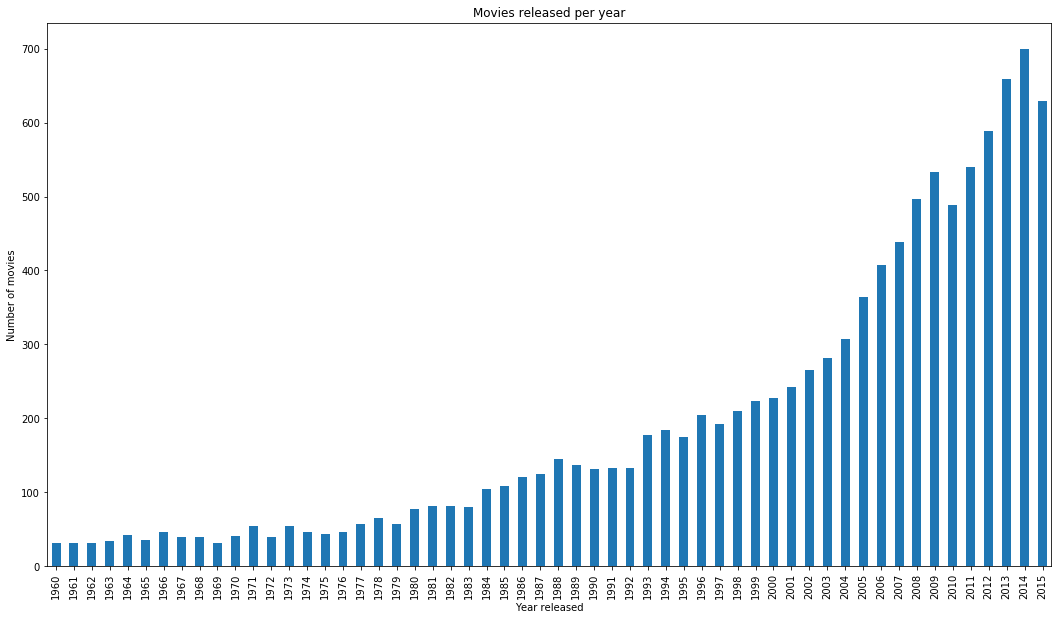

In [24]:
df_movie_count.plot(kind='bar',figsize=(18,10))
plt.title('Movies released per year')
plt.xlabel('Year released')
plt.ylabel('Number of movies')

The number of movies released has increased from 1960 to 2015. Maximum number of movies were released in 2014

In [25]:
df_top_year = df[df.release_year == 2014]

In [26]:
df_top_year.revenue.sum()

24331150183

The total revenue of all movies in 2014 is 24331150183.

## Research Question 2  - Does movies with high budget have high revenue?


Inorder to find this we need to understand the correlation between revenue and other variables.

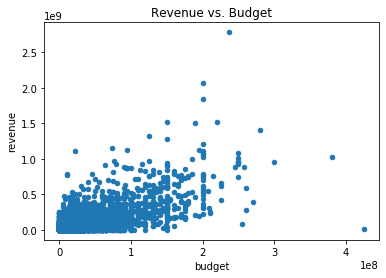

In [27]:
df.plot(x = 'budget', y = 'revenue', kind='scatter', title = 'Revenue vs. Budget')

It can be noticed that generally movies with higher budget gives higher revenue. But outliers can also be noticed. i.e, certain high budget movies did not produce high revenue

# Research Question 3  - What trend is noticed through years in terms of revenue?

In [28]:
# The revenue inflation needs to be considered while finding the correlation between year and revenue. 
df_rev = pd.DataFrame(df.groupby('release_year').revenue_adj.sum())

In [29]:
df_rev['revenue_in_millions'] = df_rev['revenue_adj']/1000000

In [30]:
df_rev.head()

,revenue_adj,revenue_in_millions
release_year,,
1960,1.069117e+09,1069.117146
1961,2.463622e+09,2463.621899
1962,1.553996e+09,1553.996299
1963,1.334357e+09,1334.357137
1964,2.397193e+09,2397.193109


In [31]:
df_rev=df_rev.reset_index()

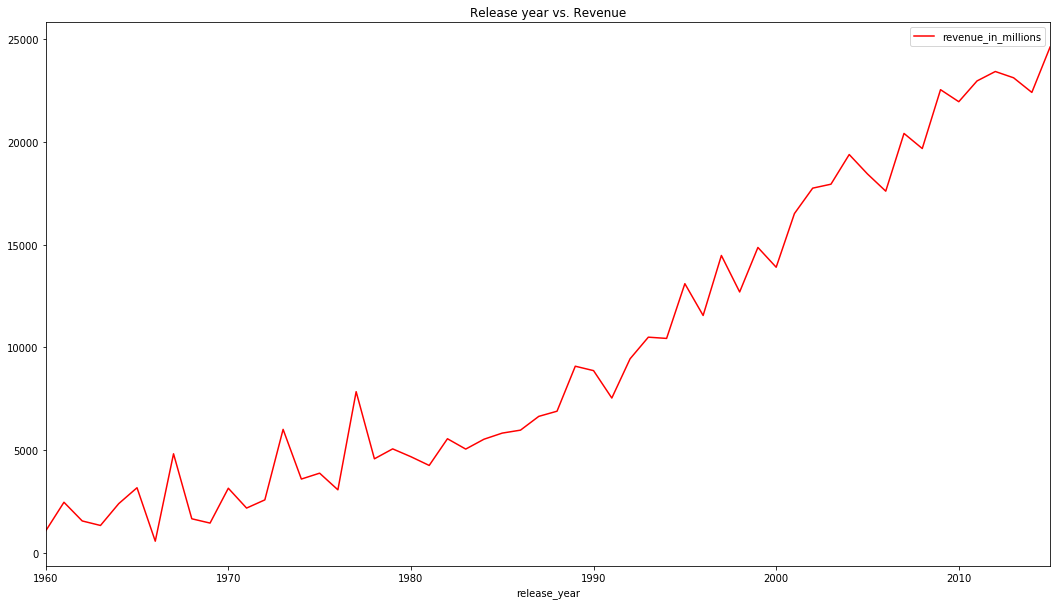

In [32]:
df_rev.plot(x = 'release_year', y = 'revenue_in_millions', kind='line', title = 'Release year vs. Revenue',figsize = (18,10),color='r')

The revenue has increased over the years

# Research Question 3  - Most popular movie and its features?

In [33]:
#Most popular movie based on popularity
pop_movie = df[df.popularity == df.popularity.max()]
pop_movie

,id,popularity,budget,revenue,original_title,cast,genres,production_companies,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None


In [34]:
profit = pop_movie.revenue - pop_movie.budget
profit/1000000

0    1363.52881
dtype: float64

Most popular movie is Jurassic Park, released in 2015 with a popularity index of 32.98. Profit earned is 1363.52 Million

# Research Question 4  - Top Genres from 2010 to 2015

In [35]:
# The genre in which maximum movie are released is considered as top genre

In [36]:
df_top_genre = df.melt(id_vars='release_year', value_vars=['genre_1','genre_2','genre_3','genre_4','genre_5'])
df_top_genre.head()

,release_year,variable,value
0,2015,genre_1,Action
1,2015,genre_1,Action
2,2015,genre_1,Adventure
3,2015,genre_1,Action
4,2015,genre_1,Action


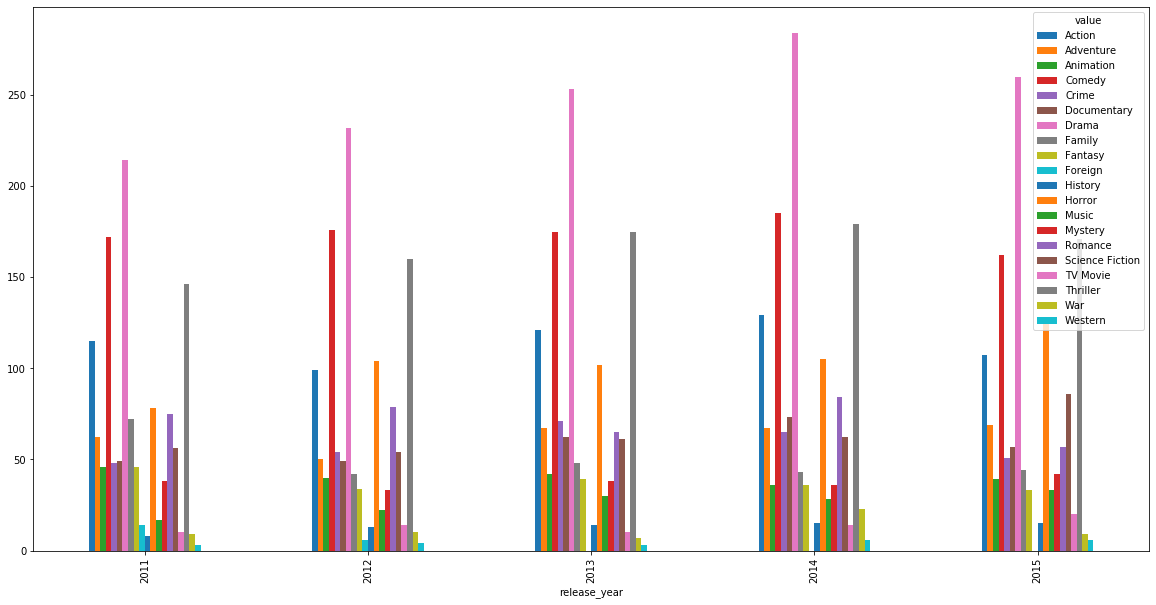

In [37]:
df_genre_per_year = df_top_genre.groupby(['release_year','value']).count()
df_genre_per_year = df_genre_per_year.reset_index()

df_t = df_genre_per_year.pivot(index='release_year', columns='value', values='variable')
df_t = df_t.reset_index()

#Filtering movies made after 2010
df_t_filtered = df_t[df_t.release_year > 2010]

#Plotting genre for years 2010 to 2015
df_t_filtered.plot(x="release_year", kind="bar",figsize=(20,10))

In [38]:
#When I drilled down to movies created from 2010 to 2015, the top genre is Drama, followed by Comedy and Thriller.

<a id='conclusions'></a>
## Conclusions

From the above analysis, it can be concluded that the number of movies released in each year has increased considerable over the year. Maximum number of movies were released in 2014.

Movies with high budget has higher revenue. There is a positive correlation between revenue and budget.

Revenue has increased through years.

The movie popular movie of all years is Jurassic Park released in 2015. The movie made a profit of 1363.5 Million

The top 3 genres between 2010 and 2015 is Drama,Comedy and Thriller.